# Gradient boosting regression

Predict car prices

In [39]:
import math
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

# Do not use normal form (scietific notation) when printing numbers, exponents can make it harder to compare values
pd.set_option('float_format', '{:f}'.format)

Populating the interactive namespace from numpy and matplotlib


In [2]:
'numpy: {}, pandas: {}, sklearn: {}'.format(np.__version__, pd.__version__, sklearn.__version__)

'numpy: 1.14.3, pandas: 0.23.0, sklearn: 0.19.1'

## Import

Data sourced from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [3]:
auto_data = pd.read_csv('../datasets/autos-imports-85.data', sep=r'\s*,\s*', engine='python', na_values=['?'])

## Explore

In [4]:
auto_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
symboling,3,3,1,2,2,2,1,1,1,0
normalized-losses,NaN,NaN,NaN,164.000000,164.000000,NaN,158.000000,NaN,158.000000,NaN
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo
num-of-doors,two,two,two,four,four,two,four,four,four,two
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd
engine-location,front,front,front,front,front,front,front,front,front,front
wheel-base,88.600000,88.600000,94.500000,99.800000,99.400000,99.800000,105.800000,105.800000,105.800000,99.500000


In [5]:
auto_data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Describe, including all fields

In [6]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,nan,nan,22,2,2,2,5,3,2,nan,...,nan,8,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,toyota,gas,std,four,sedan,fwd,front,nan,...,nan,mpfi,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,32,185,168,114,96,120,202,nan,...,nan,94,nan,nan,nan,nan,nan,nan,nan,nan
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

## Prepare

Change price from `object` to `float`

In [8]:
auto_data['price'].describe()

count     201.000000
mean    13207.129353
std      7947.066342
min      5118.000000
25%      7775.000000
50%     10295.000000
75%     16500.000000
max     45400.000000
Name: price, dtype: float64

In [9]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')

Remove column that is not useful in predicting price

In [10]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,...,130,mpfi,3.470000,2.680000,9.000000,111.000000,5000.000000,21,27,13495.000000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,...,130,mpfi,3.470000,2.680000,9.000000,111.000000,5000.000000,21,27,16500.000000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,...,152,mpfi,2.680000,3.470000,9.000000,154.000000,5000.000000,19,26,16500.000000
3,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,...,109,mpfi,3.190000,3.400000,10.000000,102.000000,5500.000000,24,30,13950.000000
4,2,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,...,136,mpfi,3.190000,3.400000,8.000000,115.000000,5500.000000,18,22,17450.000000


In [11]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Convert `horsepower` to numeric

In [12]:
auto_data['horsepower'].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        nan,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.])

In [13]:
auto_data['horsepower'].describe()

count   203.000000
mean    104.256158
std      39.714369
min      48.000000
25%      70.000000
50%      95.000000
75%     116.000000
max     288.000000
Name: horsepower, dtype: float64

In [14]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')

In [15]:
auto_data['horsepower'].describe()

count   203.000000
mean    104.256158
std      39.714369
min      48.000000
25%      70.000000
50%      95.000000
75%     116.000000
max     288.000000
Name: horsepower, dtype: float64

Convert `cylinders` from categorical to numeric

In [16]:
auto_data['num-of-cylinders'].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [17]:
auto_data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [18]:
cylinders_dict = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,...,130,mpfi,3.470000,2.680000,9.000000,111.000000,5000.000000,21,27,13495.000000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,...,130,mpfi,3.470000,2.680000,9.000000,111.000000,5000.000000,21,27,16500.000000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,...,152,mpfi,2.680000,3.470000,9.000000,154.000000,5000.000000,19,26,16500.000000
3,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,...,109,mpfi,3.190000,3.400000,10.000000,102.000000,5500.000000,24,30,13950.000000
4,2,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,...,136,mpfi,3.190000,3.400000,8.000000,115.000000,5500.000000,18,22,17450.000000


In [19]:
auto_data['num-of-cylinders'].describe()

count   205.000000
mean      4.380488
std       1.080854
min       2.000000
25%       4.000000
50%       4.000000
75%       4.000000
max      12.000000
Name: num-of-cylinders, dtype: float64

Convert categorical values into one-hot representations

In [20]:
auto_data = pd.get_dummies(auto_data,
                            columns=['make',
                                    'fuel-type',
                                    'aspiration',
                                    'num-of-doors',
                                    'body-style',
                                    'drive-wheels',
                                    'engine-location',
                                    'engine-type',
                                    'fuel-system'])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.600000,168.800000,64.100000,48.800000,2548,4,130,3.470000,2.680000,...,0,0,0,0,0,0,0,1,0,0
1,3,88.600000,168.800000,64.100000,48.800000,2548,4,130,3.470000,2.680000,...,0,0,0,0,0,0,0,1,0,0
2,1,94.500000,171.200000,65.500000,52.400000,2823,6,152,2.680000,3.470000,...,1,0,0,0,0,0,0,1,0,0
3,2,99.800000,176.600000,66.200000,54.300000,2337,4,109,3.190000,3.400000,...,0,0,0,0,0,0,0,1,0,0
4,2,99.400000,176.600000,66.400000,54.300000,2824,5,136,3.190000,3.400000,...,0,0,0,0,0,0,0,1,0,0


Drop rows with null values

In [21]:
auto_data = auto_data.dropna()

Check for any null values

In [22]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


## Train

In [23]:
X = auto_data.drop('price', axis=1)

Y = auto_data['price']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

params = { "n_estimators": 500,
           "max_depth": 6,
           "min_samples_split": 2,
           "learning_rate": 0.01,
           "loss": "ls"
         }

gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [29]:
y_predict = gbr_model.predict(x_test)

## Evaluate

View the R^2 on the training dataset

In [31]:
r_square_train = gbr_model.score(X_train, Y_train)
r_square_train

0.9983862634096469

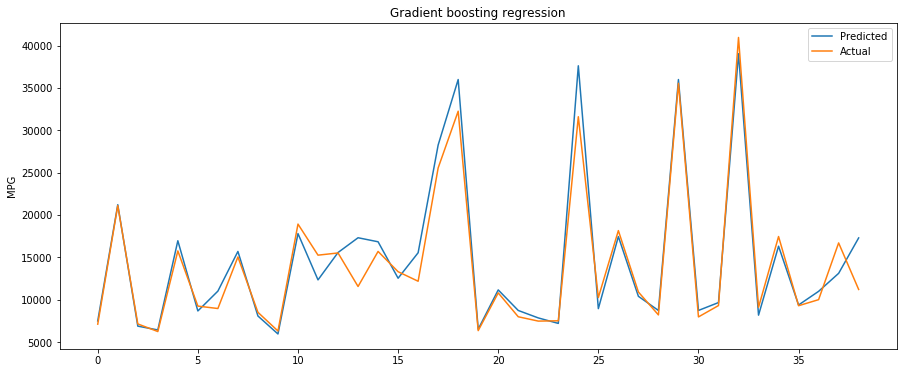

In [38]:
plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.title('Gradient boosting regression')
plt.legend()
plt.show()

View the R^2 on the test dataset

In [33]:
r_square_test = gbr_model.score(x_test, y_test)
r_square_test

0.9342373557864488

In [34]:
gbr_model_mse = mean_squared_error(y_predict, y_test)
gbr_model_mse

4667409.502074423

In [35]:
math.sqrt(gbr_model_mse)

2160.4188256156312

## Grid search

`return_train_score=True` so for every model the grid search trains we'll get a score to indicate how well that model performed

In [42]:
num_estimators = [100, 200, 500]
learning_rates = [0.01, 0.02, 0.05, 0.1]
max_depths = [4, 6, 8]

param_grid = {
    "n_estimators": num_estimators,
    "learning_rate": learning_rates,
    "max_depth": max_depths
}

gs_gbr = GradientBoostingRegressor(min_samples_split=2, loss="ls")
grid_search = GridSearchCV(gs_gbr, param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}

View the results of every model set up by the grid search. There are _3_ estimators, _4_ learn rates and _3_ max depths, hence 3x4x3 paramater combinations and 36 models.

In [46]:
pd.DataFrame(grid_search.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.079926,0.159200,0.360936,0.104394,0.222331,0.473726,0.142037,0.281397,0.723912,0.070969,...,0.628472,0.064864,0.128867,0.303503,0.097472,0.193464,0.431852,0.135572,0.257574,0.481526
std_fit_time,0.009552,0.008711,0.017296,0.009440,0.011219,0.019427,0.005108,0.014054,0.061776,0.001804,...,0.029771,0.004488,0.004496,0.003785,0.001254,0.014006,0.010104,0.005427,0.021875,0.017097
mean_score_time,0.001014,0.001299,0.002004,0.001672,0.001603,0.002771,0.000872,0.002004,0.004209,0.000999,...,0.002976,0.001304,0.000823,0.002006,0.001015,0.001523,0.002645,0.000909,0.001664,0.002609
std_score_time,0.000019,0.000537,0.000814,0.000473,0.000408,0.000473,0.000207,0.000012,0.000190,0.000770,...,0.000299,0.000495,0.000253,0.000018,0.000015,0.000467,0.000440,0.000043,0.000470,0.000864
param_learning_rate,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.020000,...,0.050000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
param_max_depth,4,4,4,6,6,6,8,8,8,4,...,8,4,4,4,6,6,6,8,8,8
param_n_estimators,100,200,500,100,200,500,100,200,500,100,...,500,100,200,500,100,200,500,100,200,500
params,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...","{'learning_rate': 0.01, 'max_depth': 4, 'n_est...","{'learning_rate': 0.01, 'max_depth': 4, 'n_est...","{'learning_rate': 0.01, 'max_depth': 6, 'n_est...","{'learning_rate': 0.01, 'max_depth': 6, 'n_est...","{'learning_rate': 0.01, 'max_depth': 6, 'n_est...","{'learning_rate': 0.01, 'max_depth': 8, 'n_est...","{'learning_rate': 0.01, 'max_depth': 8, 'n_est...","{'learning_rate': 0.01, 'max_depth': 8, 'n_est...","{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",...,"{'learning_rate': 0.05, 'max_depth': 8, 'n_est...","{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...","{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...","{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...","{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...","{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...","{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...","{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...","{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...","{'learning_rate': 0.1, 'max_depth': 8, 'n_esti..."
split0_test_score,0.747480,0.827668,0.827869,0.773811,0.834480,0.821246,0.777176,0.840333,0.821116,0.824277,...,0.820530,0.835893,0.825475,0.832551,0.822004,0.814324,0.816761,0.810418,0.817673,0.827616
split1_test_score,0.730253,0.835446,0.865627,0.728101,0.847314,0.874674,0.717968,0.827718,0.855610,0.841364,...,0.854015,0.860580,0.858336,0.871835,0.866634,0.870585,0.877794,0.854356,0.855275,0.846258


In [51]:
for i in range(36):
    print("Parameters: ", grid_search.cv_results_["params"][i])
    print("Mean test score: ", grid_search.cv_results_["mean_test_score"][i])
    print("Rank: ", grid_search.cv_results_["rank_test_score"][i])
    print()

Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Mean test score:  0.7165169273997878
Rank:  36

Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Mean test score:  0.8351388815934728
Rank:  32

Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Mean test score:  0.8643632499710966
Rank:  8

Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Mean test score:  0.7238926520848358
Rank:  34

Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
Mean test score:  0.839694453806081
Rank:  28

Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
Mean test score:  0.8605124859610149
Rank:  11

Parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}
Mean test score:  0.7225621174832718
Rank:  35

Parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200}
Mean test score:  0.8346590325966715
Rank:  33

Parameters:  {'learning_ra

Create model using the best parameters

In [52]:
best_params = {'n_estimators': 200, 
              'max_depth': 4,
              "min_samples_split": 2,
              'learning_rate': 0.05, 
             "loss": "ls"}
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [53]:
y_predict_best = best_model.predict(x_test)

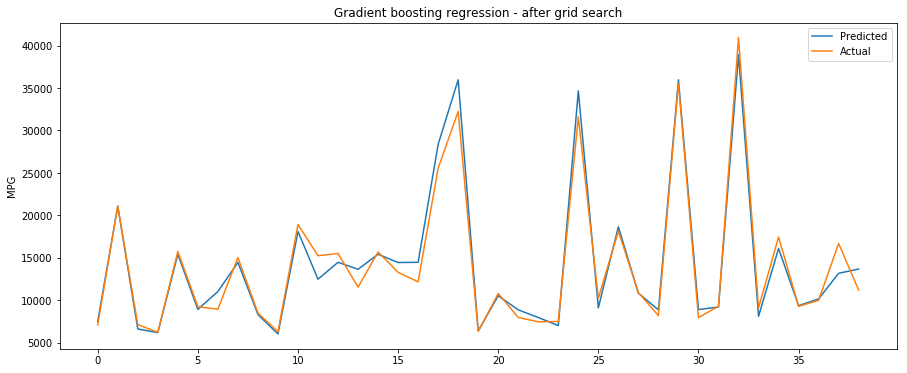

In [54]:
plt.plot(y_predict_best, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.title('Gradient boosting regression - after grid search')
plt.legend()
plt.show()

In [56]:
r_square_test_best = best_model.score(x_test, y_test)
r_square_test_best

0.9685341672131363

In [58]:
gbr_mse_best = mean_squared_error(y_predict_best, y_test)
math.sqrt(gbr_mse_best)

1494.4037016525922